In [1]:
import pandas as pd

from datetime import datetime
import numpy as np
retail= pd.read_csv('online_retail2.csv')

In [3]:
retail.shape

(1067371, 8)

In [4]:
retail=retail.drop_duplicates()
retail.shape

(1033036, 8)

In [5]:
retail= retail.dropna(axis=0,how='any')
retail.shape

(797885, 8)

In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


In [7]:
retail['InvoiceDate']=pd.to_datetime(retail.InvoiceDate)

In [9]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  float64       
 7   Country      797885 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 54.8+ MB


In [10]:
# Getting components from datetime
# retail['InvoiceDate'].dt.year.head(2)
retail.InvoiceDate.dt.year.head(2)

0    2009
1    2009
Name: InvoiceDate, dtype: int64

In [11]:
retail['InvoiceDate'].dt.month.head(2)

0    12
1    12
Name: InvoiceDate, dtype: int64

In [12]:
retail['InvoiceDate'].dt.week.head(2)

C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


0    49
1    49
Name: InvoiceDate, dtype: int64

In [13]:
retail['InvoiceDate'].dt.day.head(2)

0    1
1    1
Name: InvoiceDate, dtype: int64

What if I want to change the format of my date column

In [14]:
retail.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


%B=month %Y= Year

you can get components from your date using the dt function

In [15]:
retail['InvoiceDate'].dt.strftime('%B %Y').head(2)

0    December 2009
1    December 2009
Name: InvoiceDate, dtype: object

In [16]:
# Week and Year
retail['InvoiceDate'].dt.strftime('%W %Y').head(2)

0    48 2009
1    48 2009
Name: InvoiceDate, dtype: object

In [17]:
# Make inferences, min or max date
retail['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [18]:
retail['InvoiceDate'].min()

Timestamp('2009-12-01 07:45:00')

In [19]:
# Duration between min and max date
retail['InvoiceDate'].max() -retail['InvoiceDate'].min()

Timedelta('738 days 05:05:00')

## Last purchase date and recency

Since how long the customer purchased from us.

In [34]:
## max Date of dataset
max_date=retail.InvoiceDate.max()
max_date

Timestamp('2011-12-09 12:50:00')

In [23]:
retail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [31]:
retail.groupby('Customer ID',as_index=False).agg(InvoiceDate=('InvoiceDate','max'))


,Customer ID,InvoiceDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
5937,18283.0,2011-12-06 12:02:00
5938,18284.0,2010-10-06 12:31:00
5939,18285.0,2010-02-17 10:24:00
5940,18286.0,2010-08-20 11:57:00


In [32]:
# Alternatively
last_purchase_Date= retail.groupby('Customer ID',as_index=False)['InvoiceDate'].max()
last_purchase_Date

,Customer ID,InvoiceDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
5937,18283.0,2011-12-06 12:02:00
5938,18284.0,2010-10-06 12:31:00
5939,18285.0,2010-02-17 10:24:00
5940,18286.0,2010-08-20 11:57:00


In [33]:
last_purchase_Date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5942 entries, 0 to 5941
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer ID  5942 non-null   float64       
 1   InvoiceDate  5942 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 139.3 KB


Customer ID here is numeric, we can convert ot to a string, no problem. But it is okay.

Now we will make a new column, thus when last did customers purchase from us

In [35]:
last_purchase_Date['Recency']=max_date-last_purchase_Date['InvoiceDate']
last_purchase_Date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5942 entries, 0 to 5941
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   Customer ID  5942 non-null   float64        
 1   InvoiceDate  5942 non-null   datetime64[ns] 
 2   Recency      5942 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), timedelta64[ns](1)
memory usage: 185.7 KB


In [36]:
last_purchase_Date.head(2)

,Customer ID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:17:00,325 days 02:33:00
1,12347.0,2011-12-07 15:52:00,1 days 20:58:00


In [37]:
last_purchase_Date['Recency'].describe()

count                           5942
mean     202 days 10:33:55.930663076
std      211 days 21:00:52.495651984
min                  0 days 00:00:00
25%                 24 days 01:41:45
50%                 95 days 12:20:00
75%                380 days 22:12:00
max                738 days 02:55:00
Name: Recency, dtype: object

The data is spread, as standard deviation is 211 days
Some customers, its been so long they bought from us.

Make a histogram of recency

In [38]:
import matplotlib.pyplot as plt

Recency is timedelta type, so convert it to day

In [41]:
last_purchase_Date['Recency'].dt.components['days']

0       325
1         1
2        74
3        18
4       309
       ... 
5937      3
5938    429
5939    660
5940    476
5941     42
Name: days, Length: 5942, dtype: int64

In [42]:
last_purchase_Date['Recency_days']=last_purchase_Date['Recency'].dt.components['days']

(array([2712.,  597.,  427.,  342.,  253.,  665.,  272.,  244.,  234.,
         196.]),
 array([  0. ,  73.8, 147.6, 221.4, 295.2, 369. , 442.8, 516.6, 590.4,
        664.2, 738. ]),
 <BarContainer object of 10 artists>)

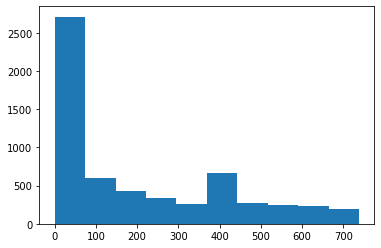

In [43]:
plt.hist(last_purchase_Date['Recency_days'])

Most of the purchases are recent, but is it skewed to the right.

## Modelling Inter-arrival time

Modeling how frequently each customer buys from us.

In [44]:
import numpy as np

In [48]:
# Getting every unique customer in the dataframe
retail['Customer ID'].unique()

array([13085., 13078., 15362., ..., 15520., 13298., 12713.])

In [49]:
len(retail['Customer ID'].unique())

5942

In [45]:
# Getting every unique customer in the dataframe
customers = np.unique(retail['Customer ID']) 

array([12346., 12347., 12348., ..., 18285., 18286., 18287.])

In [50]:
print(f'{len(customers)} unique customers')

5942 unique customers


create a loop to get dates and previous date

In [52]:
retail['InvoiceDate'].head(2)

0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
Name: InvoiceDate, dtype: datetime64[ns]

In [53]:
retail['date']= retail['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [54]:
retail['date'].head(2)

0    2009-12-01
1    2009-12-01
Name: date, dtype: object

Groupby every customer and date

In [55]:
# This merges the customers id and dates
retail.groupby(['Customer ID','date'],as_index=False).count()

,Customer ID,date,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country
0,12346.0,2009-12-14,3,3,3,3,3,3,3
1,12346.0,2009-12-18,2,2,2,2,2,2,2
2,12346.0,2010-01-04,2,2,2,2,2,2,2
3,12346.0,2010-01-14,1,1,1,1,1,1,1
4,12346.0,2010-01-22,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
38497,18287.0,2010-09-21,21,21,21,21,21,21,21
38498,18287.0,2010-11-22,10,10,10,10,10,10,10
38499,18287.0,2011-05-22,29,29,29,29,29,29,29
38500,18287.0,2011-10-12,38,38,38,38,38,38,38


In [56]:
customer_grouped=retail.groupby(['Customer ID','date'],as_index=False).count()[['Customer ID','date']]

In [57]:
customer_grouped

,Customer ID,date
0,12346.0,2009-12-14
1,12346.0,2009-12-18
2,12346.0,2010-01-04
3,12346.0,2010-01-14
4,12346.0,2010-01-22
...,...,...
38497,18287.0,2010-09-21
38498,18287.0,2010-11-22
38499,18287.0,2011-05-22
38500,18287.0,2011-10-12


make a new column and shifting every date.

In [59]:
customers# unique customers

array([12346., 12347., 12348., ..., 18285., 18286., 18287.])

In [62]:
customer_grouped[customer_grouped['Customer ID']==12346]

,Customer ID,date
0,12346.0,2009-12-14
1,12346.0,2009-12-18
2,12346.0,2010-01-04
3,12346.0,2010-01-14
4,12346.0,2010-01-22
5,12346.0,2010-01-26
6,12346.0,2010-03-02
7,12346.0,2010-06-28
8,12346.0,2010-06-30
9,12346.0,2010-10-04


In [65]:
customer_grouped[customer_grouped['Customer ID']==12346].shift(1)

,Customer ID,date
0,NaN,NaN
1,12346.0,2009-12-14
2,12346.0,2009-12-18
3,12346.0,2010-01-04
4,12346.0,2010-01-14
5,12346.0,2010-01-22
6,12346.0,2010-01-26
7,12346.0,2010-03-02
8,12346.0,2010-06-28
9,12346.0,2010-06-30


In [60]:
inter_data=pd.DataFrame()

In [66]:
for customer in customers:
    c_d= customer_grouped[customer_grouped['Customer ID']==customer]
    c_d['previous_date']=c_d['date'].shift(1)
    inter_data=pd.concat([inter_data,c_d],axis=0)

C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [67]:
inter_data

,Customer ID,date,previous_date
0,12346.0,2009-12-14,NaN
1,12346.0,2009-12-18,2009-12-14
2,12346.0,2010-01-04,2009-12-18
3,12346.0,2010-01-14,2010-01-04
4,12346.0,2010-01-22,2010-01-14
...,...,...,...
38497,18287.0,2010-09-21,2010-05-17
38498,18287.0,2010-11-22,2010-09-21
38499,18287.0,2011-05-22,2010-11-22
38500,18287.0,2011-10-12,2011-05-22


As seen, every date has previous purchase per customer. e.g row 0 has no previous_date because it is the sate for that customer.

In [68]:
inter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38502 entries, 0 to 38501
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    38502 non-null  float64
 1   date           38502 non-null  object 
 2   previous_date  32560 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


date and previous_date are objects, so convert them to datetime

In [69]:
inter_data['date']=pd.to_datetime(inter_data['date'])
inter_data['previous_date']=pd.to_datetime(inter_data['previous_date'])

In [70]:
inter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38502 entries, 0 to 38501
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer ID    38502 non-null  float64       
 1   date           38502 non-null  datetime64[ns]
 2   previous_date  32560 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 1.2 MB


In [71]:
inter_data['duration']= inter_data['date']-inter_data['previous_date']

In [72]:
inter_data['duration'].head()

0       NaT
1    4 days
2   17 days
3   10 days
4    8 days
Name: duration, dtype: timedelta64[ns]

In [73]:
inter_data['duration']=inter_data['duration'].dt.components['days']

In [74]:
inter_data['duration'].head()

0     NaN
1     4.0
2    17.0
3    10.0
4     8.0
Name: duration, dtype: float64

In [75]:
inter_data.head()

,Customer ID,date,previous_date,duration
0,12346.0,2009-12-14,NaT,NaN
1,12346.0,2009-12-18,2009-12-14,4.0
2,12346.0,2010-01-04,2009-12-18,17.0
3,12346.0,2010-01-14,2010-01-04,10.0
4,12346.0,2010-01-22,2010-01-14,8.0


In [ ]:
## get the interarrival time

In [76]:
inter_arrival=inter_data.groupby('Customer ID')['duration'].mean()

In [77]:
inter_arrival

Customer ID
12346.0     40.000000
12347.0     57.428571
12348.0     90.750000
12349.0    179.250000
12350.0           NaN
              ...    
18283.0     36.388889
18284.0      2.000000
18285.0           NaN
18286.0    123.500000
18287.0    116.000000
Name: duration, Length: 5942, dtype: float64

## Resampling

Resampling means that you are diminishing your data, e.g.

If you have 365 days of sales data, if you resample you can make it to 52.4 sales, monthly 12 months of sales e.t.c.

In [79]:
stocks=pd.read_csv('stocks.csv')
stocks

,Date,AAPL,IBM,CSCO,MSFT
0,2000-01-03,111.937502,116.000000,108.062500,116.562500
1,2000-01-04,102.500003,112.062500,102.000000,112.625000
2,2000-01-05,103.999997,116.000000,101.687500,113.812500
3,2000-01-06,94.999998,114.000000,100.000000,110.000000
4,2000-01-07,99.500001,113.500000,105.875000,111.437500
...,...,...,...,...,...
3516,2013-12-24,567.669975,183.220001,21.690001,37.080002
3517,2013-12-26,563.900009,185.350006,21.799999,37.439999
3518,2013-12-27,560.089989,185.080002,22.020000,37.290001
3519,2013-12-30,554.519981,186.410004,22.250000,37.290001


In [80]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3521 non-null   object 
 1   AAPL    3521 non-null   float64
 2   IBM     3521 non-null   float64
 3   CSCO    3521 non-null   float64
 4   MSFT    3521 non-null   float64
dtypes: float64(4), object(1)
memory usage: 137.7+ KB


date is an object while importing you can parse the date as datetime and which column as index

In [81]:
stocks=pd.read_csv('stocks.csv',index_col='Date',parse_dates= True)
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3521 entries, 2000-01-03 to 2013-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3521 non-null   float64
 1   IBM     3521 non-null   float64
 2   CSCO    3521 non-null   float64
 3   MSFT    3521 non-null   float64
dtypes: float64(4)
memory usage: 137.5 KB


In [82]:
stocks

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.000000,108.062500,116.562500
2000-01-04,102.500003,112.062500,102.000000,112.625000
2000-01-05,103.999997,116.000000,101.687500,113.812500
2000-01-06,94.999998,114.000000,100.000000,110.000000
2000-01-07,99.500001,113.500000,105.875000,111.437500
...,...,...,...,...
2013-12-24,567.669975,183.220001,21.690001,37.080002
2013-12-26,563.900009,185.350006,21.799999,37.439999
2013-12-27,560.089989,185.080002,22.020000,37.290001


Having the date as index, allows us to do manipulations easier e.g ploting easily.

<AxesSubplot:xlabel='Date'>

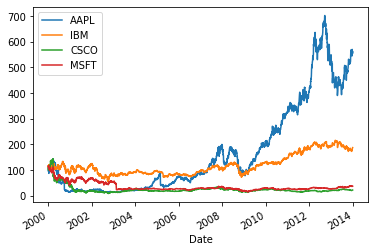

In [83]:
stocks.plot()

Because I have it as an index, I can plot only one year easily

C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

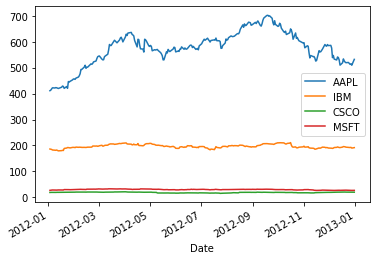

In [84]:
stocks['2012'].plot()

<AxesSubplot:xlabel='Date'>

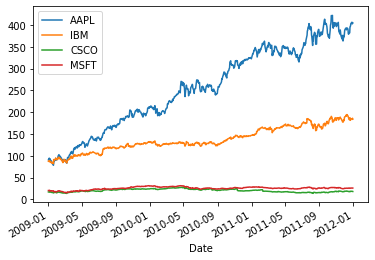

In [86]:
stocks['2009':'2011'].plot()

Resampling means I trying to group the date, e.g from daily to monthly series.

In [91]:
help(stocks.resample('M'))

Help on DatetimeIndexResampler in module pandas.core.resample object:

class DatetimeIndexResampler(Resampler)
 |  DatetimeIndexResampler(*args, **kwds)
 |  
 |  Class for resampling datetimelike data, a groupby-like operation.
 |  See aggregate, transform, and apply functions on this object.
 |  
 |  It's easiest to use obj.resample(...) to use Resampler.
 |  
 |  Parameters
 |  ----------
 |  obj : pandas object
 |  groupby : a TimeGrouper object
 |  axis : int, default 0
 |  kind : str or None
 |      'period', 'timestamp' to override default index treatment
 |  
 |  Returns
 |  -------
 |  a Resampler of the appropriate type
 |  
 |  Notes
 |  -----
 |  After resampling, see aggregate, apply, and transform functions.
 |  
 |  Method resolution order:
 |      DatetimeIndexResampler
 |      Resampler
 |      pandas.core.groupby.groupby.BaseGroupBy
 |      pandas.core.groupby.base.ShallowMixin
 |      pandas.core.base.PandasObject
 |      pandas.core.accessor.DirNamesMixin
 |      pan

Resamples time-series data


In [93]:
# Daily
stocks

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.000000,108.062500,116.562500
2000-01-04,102.500003,112.062500,102.000000,112.625000
2000-01-05,103.999997,116.000000,101.687500,113.812500
2000-01-06,94.999998,114.000000,100.000000,110.000000
2000-01-07,99.500001,113.500000,105.875000,111.437500
...,...,...,...,...
2013-12-24,567.669975,183.220001,21.690001,37.080002
2013-12-26,563.900009,185.350006,21.799999,37.439999
2013-12-27,560.089989,185.080002,22.020000,37.290001


In [95]:
# Monthly
monthly_series_mean=stocks.resample('M').mean()
monthly_series_mean

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-31,103.359375,116.818750,107.590625,107.115625
2000-02-29,111.638281,113.237500,127.730469,99.300000
2000-03-31,128.502717,111.527174,117.514946,99.815217
2000-04-30,123.105263,114.154605,68.007401,79.009868
2000-05-31,100.810368,107.687500,59.800426,67.071023
...,...,...,...,...
2013-08-31,484.843635,187.125000,24.948636,32.485000
2013-09-30,480.184499,188.767000,24.080000,32.523500
2013-10-31,504.744783,180.710002,22.847391,34.382174


<AxesSubplot:xlabel='Date'>

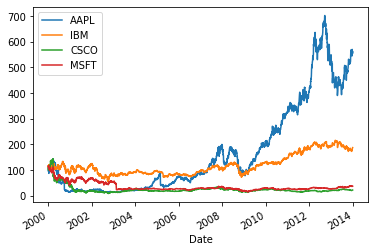

In [98]:
stocks.plot()

<AxesSubplot:xlabel='Date'>

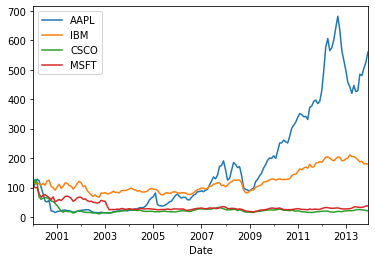

In [99]:
# This is smoother compared to the above, so noice was removed
monthly_series_mean.plot()

In [100]:
year_series_mean= stocks.resample('Y').mean()
year_series_mean.head()

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-12-31,71.749378,110.628410,74.140377,76.220486
2001-12-31,20.219435,107.525796,20.673357,62.542175
2002-12-31,19.139444,84.190198,14.615198,54.549048
2003-12-31,18.544762,85.112301,17.813532,29.238214
2004-12-31,35.526944,90.770436,21.602460,27.124762


In [101]:
weekly_series_mean= stocks.resample('W').mean()
weekly_series_mean.head()

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-09,102.587500,114.3125,103.525000,112.887500
2000-01-16,94.975000,118.8750,106.775000,109.500000
2000-01-23,108.828123,118.9375,112.984375,108.015625
2000-01-30,108.062503,116.4875,107.775000,100.087500
2000-02-06,102.825000,113.7000,116.025000,102.362500


Other Operations you can do includes

* SUM (),
* first() like first day of the month
* last() like last day of the month

## Rolling time series

If you want to get moving average, you get the data point at the previous horizon.
horizon, last 14 day, last quarter e.t.c

In [102]:
MSFT = stocks[['MSFT']]

In [103]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3521 entries, 2000-01-03 to 2013-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    3521 non-null   float64
dtypes: float64(1)
memory usage: 184.1 KB


In [105]:
MSFT.head()

,MSFT,rolling_weekly
Date,,
2000-01-03,116.5625,NaN
2000-01-04,112.6250,NaN
2000-01-05,113.8125,NaN
2000-01-06,110.0000,NaN
2000-01-07,111.4375,NaN


In [104]:
MSFT['rolling_weekly']=MSFT.rolling(window=7).mean()

C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

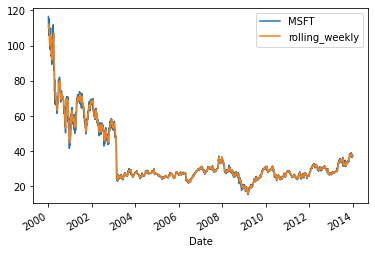

In [106]:
MSFT.plot()

The horizon is very long

C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

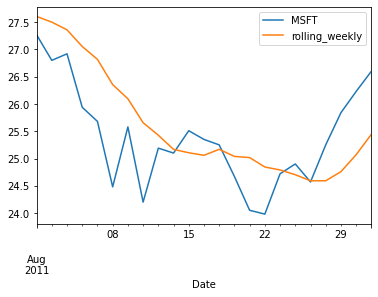

In [107]:
MSFT['Aug-2011'].plot()

As seen above, the rolling weekly is smoother than the actual observations

In [108]:
MSFT.columns

Index(['MSFT', 'rolling_weekly'], dtype='object')

In [110]:
# we have 2 columns so we need to specify that we are working  on msft column 
# not the rolling_weekly column
MSFT['rolling_monthly']= MSFT['MSFT'].rolling(window=30).mean()

C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

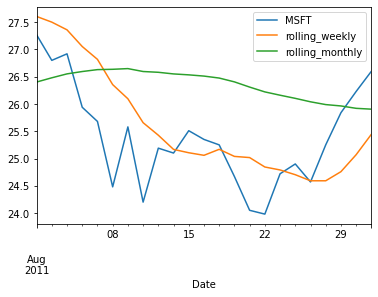

In [111]:
MSFT['Aug-2011'].plot()

its more smoother because it is taking the borders of the last months

In [ ]:
MSFT['Aug-2011':'Dec-2011'].plot()

If the moving average of the shorter horizon is dipping, then the longer horizon, that means it's better to sell.

If the moving average of the shorter is exceeding the longer horizon, that means there is tendency to buy.